# <font color='blue'>Data Science Academy - Machine Learning</font>

# <font color='blue'>Projeto com Feedback 7 </font>

# <font color='blue'> Medicina Personalizada - Redefinindo o Tratamento de Câncer V4 </font>

# <font color='blue'>02/07/2024</font>

In [1]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder  
labelEncoder = LabelEncoder()
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from scipy.sparse import hstack
from sklearn.decomposition import PCA



In [2]:
# Parâmetros de configuração dos gráficos
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

import warnings
warnings.filterwarnings("ignore")

## Entendimento do Problema/Negócio:

Para este projeto, o MSKCC (Memorial Sloan Kettering Cancer Center) está
disponibilizando uma base de conhecimento anotada por especialistas, onde
pesquisadores e oncologistas de nível mundial anotaram manualmente milhares
de mutações.

##### Neste projeto, você vai desenvolver um algoritmo de Aprendizado de
##### Máquina que, usando essa base de conhecimento como uma linha de base,
##### classifica automaticamente as variações genéticas.
##### target Classificar a Varável Target = Classe

https://www.kaggle.com/c/msk-redefining-cancer-treatment/data

####  CÂNCER: UMA DOENÇA GENÉTICA

O câncer é uma doença genética

Essa afirmação não deve ser confundida com a afirmação de que o câncer é uma doença hereditária, apenas deve ser entendida como todo câncer se desenvolve devido à alteração(ões) genética(s) e apenas pequena parte desses são hereditários. O câncer se forma quando o DNA de uma célula normal é danificado ou mutado. Essas mutações podem ocorrer em células germinativas, e dessa forma, podem ser transmitidas para a próxima geração (câncer hereditário); ou podem ocorrer em células somáticas e ficarem restritas apenas ao indivíduo (câncer esporádico). Mas, para saber melhor sobre o câncer, é fundamental relembrar alguns conceitos básicos de biologia molecular e genética.

Uma mutação pode ser resultante de erros durante algum processo biológico como a replicação do DNA ou de outros tipos de danos ao DNA. A fumaça do cigarro, por exemplo, contém produtos químicos que danificam o DNA. A radiação solar contém raios ultravioleta (ou UV) que também danificam essa sequência. Entretanto, existem diferentes tipos de mutações no DNA. Algumas mutações são apenas de um único nucleotídeo, chamadas mutações de ponto (do inglês point mutations), ou de pequenas sequências de nucleotídeos que incluem deleções, duplicações ou inserções de novos nucleotídeos.  Várias desses tipos de mutações são estudadas no gene EGFR, especialmente em câncer de pulmão de não pequenas células (CPNPC). As mutações de ponto L858R, L861Q e G719A/C/S e deleções no éxon 19 do gene estão relacionadas a boas taxas de resposta aos inibidores tirosina quinase (TKI). Por outro lado, a alteração de ponto T790M e inserção no éxon 20 condizem com resistência aos TKI de primeira e segunda geração.


## Obtenção de Dados

Identificar e obter os conjuntos de dados relevantes para o problema em questão.
Realizar a coleta de dados de várias fontes, como bancos de dados, APIs, arquivos locais, etc.

#### Trainning Variants File

ID : the id of the row used to link the mutation to the clinical evidence

Gene : the gene where this genetic mutation is located

Variation : the aminoacid change for this mutations

Class : 1-9 the class this genetic mutation has been classified on

training_variants (ID , Gene, Variations, Class)
training_text (ID, Text)

#### Trainning Texts File

In [3]:
# Reading the data on which analysis needs to be done

df_training_variants = pd.read_csv("data_files/training_variants", sep=",", encoding="UTF-8", header=0)

df_test_variants = pd.read_csv("data_files/test_variants", sep=",", encoding="UTF-8", header=0)


df_training_text =pd.read_csv("data_files/training_text",
                       sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)

df_test_text =pd.read_csv("data_files/test_text",
                       sep="\|\|",engine="python",names=["ID","TEXT"],skiprows=1)



In [4]:
df_training_variants.head(5)

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [5]:
df_training_text.head(5)

,ID,TEXT
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [6]:
df_training_text.shape

(3321, 2)

In [7]:
df_test_text.shape

(5668, 2)

## Limpeza e Pré-processamento de Dados:

Avaliar a qualidade dos dados e lidar com problemas como dados ausentes, valores discrepantes (outliers) e erros.
Normalizar ou padronizar os dados, se necessário.

In [8]:
# Checando se há valores missing
df_training_variants.isnull().values.any()

False

In [9]:
# Checando se há valores missing
df_training_text.isnull().values.any()

True

In [10]:
print(df_training_text.isna().sum())

ID      0
TEXT    5
dtype: int64


In [11]:
df_training_text.dropna()
df_test_text.dropna()

,ID,TEXT
0,0,2. This mutation resulted in a myeloproliferat...
1,1,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,Vascular endothelial growth factor receptor (V...
3,3,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,Abstract Retinoblastoma is a pediatric retina...
...,...,...
5663,5663,The realization in the late 1970s that RAS har...
5664,5664,Hemizygous deletions are common molecular abno...
5665,5665,All most R267W of has with to SMARTpool invest...
5666,5666,Abstract Blood samples from 125 unrelated fami...


In [12]:
df_training = pd.merge(df_training_variants, df_training_text,on='ID', how='left')
df_training.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [13]:
df_test = pd.merge(df_test_variants, df_test_text,on='ID', how='left')
df_test.head()

,ID,Gene,Variation,TEXT
0,0,ACSL4,R570S,2. This mutation resulted in a myeloproliferat...
1,1,NAGLU,P521L,Abstract The Large Tumor Suppressor 1 (LATS1)...
2,2,PAH,L333F,Vascular endothelial growth factor receptor (V...
3,3,ING1,A148D,Inflammatory myofibroblastic tumor (IMT) is a ...
4,4,TMEM216,G77A,Abstract Retinoblastoma is a pediatric retina...


In [14]:
# Head
df_training.head()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


In [15]:
df_training.describe(include='all')

,ID,Gene,Variation,Class,TEXT
count,3321.000000,3321,3321,3321.000000,3316
unique,NaN,264,2996,NaN,1920
top,NaN,BRCA1,Truncating Mutations,NaN,The PTEN (phosphatase and tensin homolog) phos...
freq,NaN,264,93,NaN,53
mean,1660.000000,NaN,NaN,4.365854,NaN
std,958.834449,NaN,NaN,2.309781,NaN
min,0.000000,NaN,NaN,1.000000,NaN
25%,830.000000,NaN,NaN,2.000000,NaN
50%,1660.000000,NaN,NaN,4.000000,NaN
75%,2490.000000,NaN,NaN,7.000000,NaN


In [16]:
df_test.describe(include='all')

,ID,Gene,Variation,TEXT
count,5668.000000,5668,5668,5667
unique,NaN,1397,5628,5610
top,NaN,F8,Truncating Mutations,The PTEN (phosphatase and tensin homolog) phos...
freq,NaN,134,18,6
mean,2833.500000,NaN,NaN,NaN
std,1636.354994,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,1416.750000,NaN,NaN,NaN
50%,2833.500000,NaN,NaN,NaN
75%,4250.250000,NaN,NaN,NaN


In [17]:
# Checando se há valores missing
df_training.isnull().values.any()

True

In [18]:
print(df_training.isna().sum())

ID           0
Gene         0
Variation    0
Class        0
TEXT         5
dtype: int64


In [19]:
df_training.dropna()

,ID,Gene,Variation,Class,TEXT
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...
...,...,...,...,...,...
3316,3316,RUNX1,D171N,4,Introduction Myelodysplastic syndromes (MDS) ...
3317,3317,RUNX1,A122*,1,Introduction Myelodysplastic syndromes (MDS) ...
3318,3318,RUNX1,Fusions,1,The Runt-related transcription factor 1 gene (...
3319,3319,RUNX1,R80C,4,The RUNX1/AML1 gene is the most frequent targe...


In [20]:
# shape of df
df_training.shape

(3321, 5)

In [21]:
# Tipos de Dados
df_training.dtypes

ID            int64
Gene         object
Variation    object
Class         int64
TEXT         object
dtype: object

In [22]:
# shape of df
df_training.shape

(3321, 5)

In [23]:
# shape of df
df_test.shape

(5668, 4)

In [24]:
# df description
df_training.describe()

,ID,Class
count,3321.000000,3321.000000
mean,1660.000000,4.365854
std,958.834449,2.309781
min,0.000000,1.000000
25%,830.000000,2.000000
50%,1660.000000,4.000000
75%,2490.000000,7.000000
max,3320.000000,9.000000


In [25]:
# df description
df_training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3321 entries, 0 to 3320
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         3321 non-null   int64 
 1   Gene       3321 non-null   object
 2   Variation  3321 non-null   object
 3   Class      3321 non-null   int64 
 4   TEXT       3316 non-null   object
dtypes: int64(2), object(3)
memory usage: 155.7+ KB


In [26]:
# Shape
df_training.shape

(3321, 5)

In [27]:
# Remove os registros com valores NA e remove as duas primeiras colunas (não são necessária
df_training = df_training.dropna()

In [28]:
# Verificando valores missing
print(df_training.isna().sum())


ID           0
Gene         0
Variation    0
Class        0
TEXT         0
dtype: int64


In [29]:
# Verificando Valores Únicos
df_training.nunique()

ID           3316
Gene          262
Variation    2993
Class           9
TEXT         1920
dtype: int64

In [30]:
print(df_test_text.isna().sum())

ID      0
TEXT    1
dtype: int64


In [31]:
# Verificando Valores Únicos
df_test_text.nunique()

ID      5668
TEXT    5610
dtype: int64

##  Análise Exploratória dos dados

Exploração de Dados:
Realizar análises exploratórias para entender a distribuição dos dados, identificar padrões e relações.
Visualizar os dados usando gráficos e estatísticas descritivas.

### Separação das Variáveis Categóricas e Numéricas

In [32]:
# Lista de colunas categóricas
cats = ['Gene',
        'Variation']

In [33]:
# Lista de colunas numéricas
nums = ['Class']

In [34]:
# Resumo das variáveis categóricas
df_training[cats].describe()

,Gene,Variation
count,3316,3316
unique,262,2993
top,BRCA1,Truncating Mutations
freq,264,92


In [35]:
# Listando o total por categoria de cada variável categórica
for col in cats:
    print(f'''Total de Registros Por Categoria da Variável {col}:''')
    print(df_training[col].value_counts())
    print()

Total de Registros Por Categoria da Variável Gene:
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
         ... 
RICTOR      1
PIK3R3      1
PPM1D       1
WHSC1       1
FAM58A      1
Name: Gene, Length: 262, dtype: int64

Total de Registros Por Categoria da Variável Variation:
Truncating Mutations    92
Deletion                74
Amplification           70
Fusions                 34
Overexpression           6
                        ..
H1094R                   1
M1250T                   1
PTPRZ1-MET Fusion        1
H1106D                   1
K83E                     1
Name: Variation, Length: 2993, dtype: int64



Variáveis Categóricas

[Text(0.5, 1.0, 'Top 10 Tipo de Genes')]

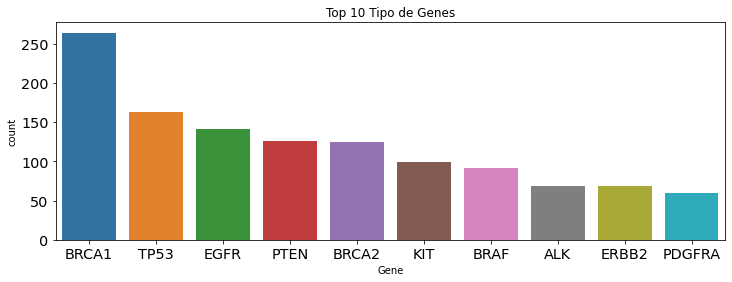

In [36]:
n = 10
message = "Top "   +  str(n) + " Tipo de Genes"
sns.countplot(x='Gene',data=df_training,order=pd.value_counts(df_training['Gene']).iloc[:10].index).set(title=message)

[Text(0.5, 1.0, 'Top 5 Tipo de Variações')]

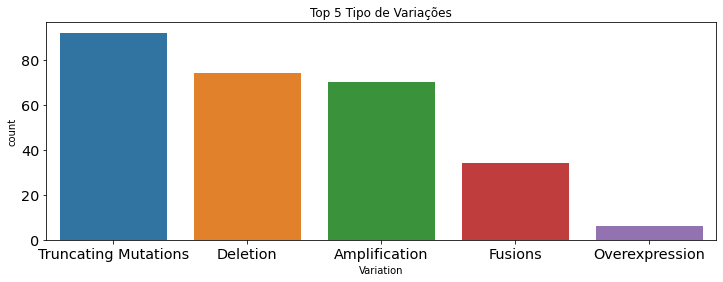

In [37]:
n = 5
message = "Top "   +  str(n) + " Tipo de Variações"
sns.countplot(x='Variation', data=df_training,order=pd.value_counts(df_training['Variation']).iloc[:n].index).set(title=message)

Variáveis Numéricas

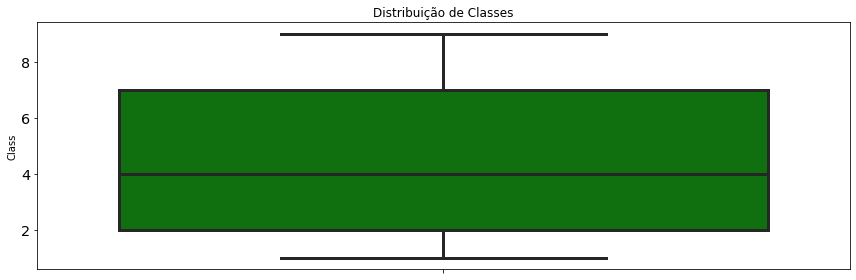

In [38]:
features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i + 1, title = 'Distribuição de Classes' )
    sns.boxplot(y = df_training[features[i]], color = 'green', orient = 'v' )
    plt.tight_layout()

[Text(0.5, 1.0, 'Tipo de Classes')]

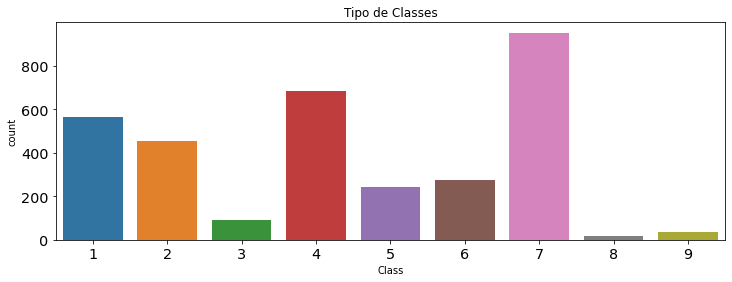

In [39]:
sns.countplot(x='Class',data=df_training).set(title="Tipo de Classes")

Análise Univariada - Dist Plots

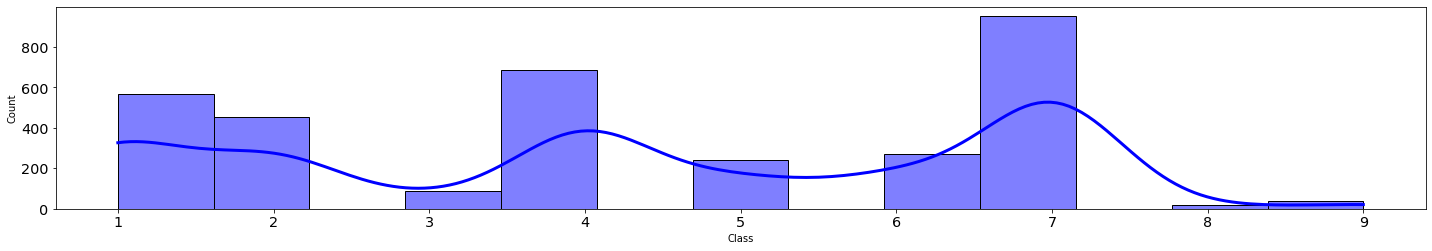

In [40]:
features = nums
plt.figure(figsize = (20, 10))
for i in range(0, len(nums)):
    #plt.subplot(3, len(nums)/2, i+1)
    plt.subplot(3, len(nums), i+1)
    sns.histplot(x = df_training[features[i]], kde = True, color = 'blue')
    plt.xlabel(features[i])
    plt.tight_layout()

Ocorrência de Genes por Classes

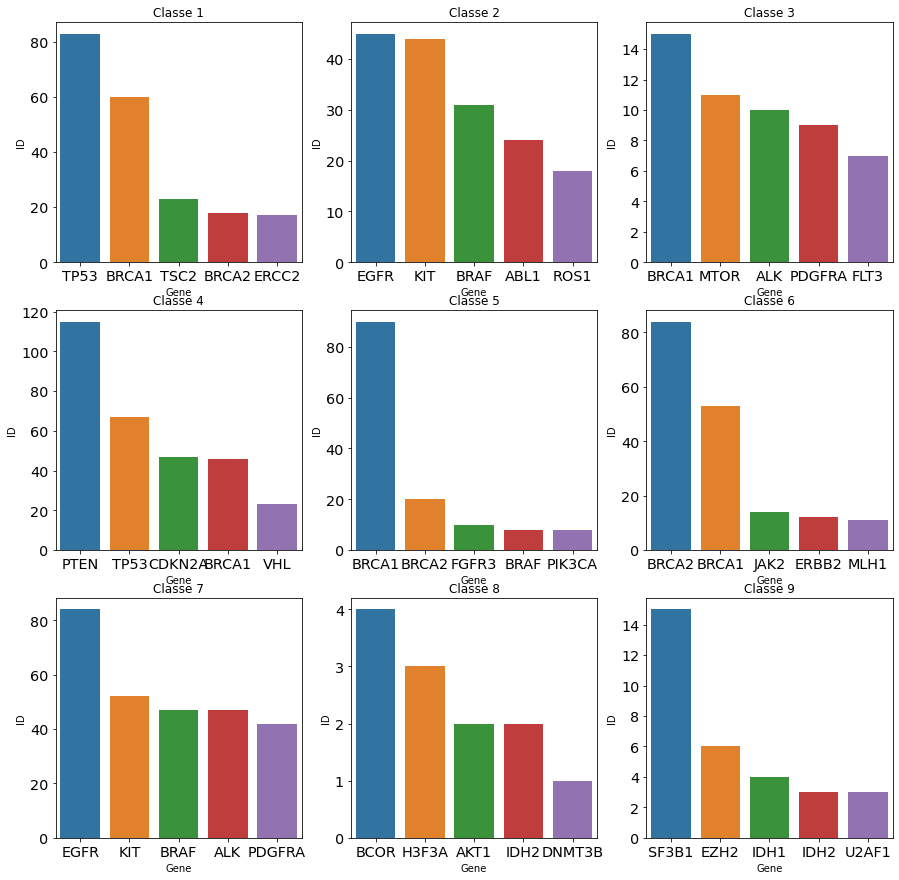

In [41]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

class_cnt = 0
for i in range(3):
    for j in range(3):
        class_cnt += 1
        msg = "Classe " + str(class_cnt) 
        gene_count_grp = df_training[df_training["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_5 = sorted_gene_group[:5]
        sns.barplot(x="Gene", y="ID", data=sorted_gene_group_top_5, ax=axs[i][j]).set_title(msg)

<iframe src="https://www.kaggle.com/embed/ouyimin19/loan-approval-prediction?cellIds=31&kernelSessionId=156453635" height="300" style="margin: 0 auto; width: 100%; max-width: 950px;" frameborder="0" scrolling="auto" title="Loan Approval Prediction🤑🤑"></iframe>

##  Pré Processamento dos Dados

Label Encoding the categorical variables

In [42]:
# Label Encoding
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# Apply the label encoder to the categorical variable
df_training['Gene_Enc'] = label_encoder.fit_transform(df_training['Gene'])
df_training['Variation_Enc'] = label_encoder.fit_transform(df_training['Variation'])

df_training_model = df_training[['Gene_Enc', 'Variation_Enc','Class']]


In [43]:
df_training_model.head()

,Gene_Enc,Variation_Enc,Class
0,84,2626,1
1,38,2853,2
2,38,1895,2
3,38,1665,3
4,38,1445,4


In [44]:
# Remove valores missing eventualmente gerados
df_training.dropna(inplace = True)
del df_training['ID'] 

[Text(0.5, 1.0, 'Distribuição das Variações de Mutações')]

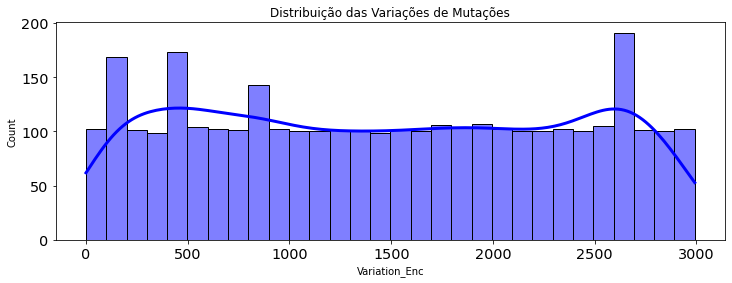

In [45]:
sns.histplot(df_training['Variation_Enc'], bins = 30, kde = True, color = 'blue').set(title="Distribuição das Variações de Mutações")

[Text(0.5, 1.0, 'Distribuição dos Genes')]

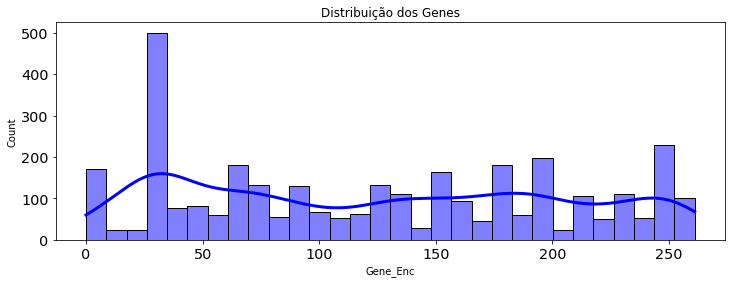

In [46]:
sns.histplot(df_training['Gene_Enc'], bins = 30, kde = True, color = 'blue').set(title="Distribuição dos Genes")

Para as variáveis Gene e Variations , não seguem uma Distribuição Normal

[Text(0.5, 1.0, 'Gene X Variation')]

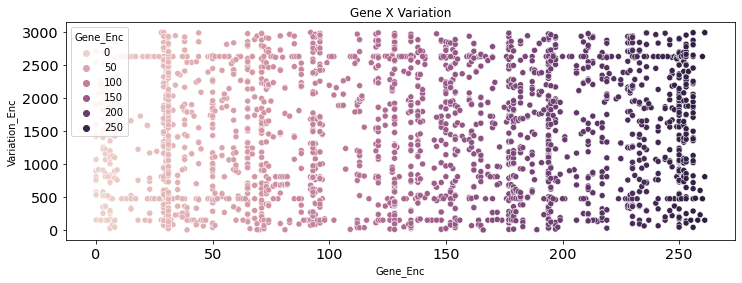

In [47]:
sns.scatterplot(x='Gene_Enc', y='Variation_Enc', data=df_training, hue='Gene_Enc', color = 'blue').set(title="Gene X Variation")

 Para as variáveis Gene e Variations , não existem correlação, os dados estão dispersos sem correlação Positiva ou Negativa

[Text(0.5, 1.0, 'Variation')]

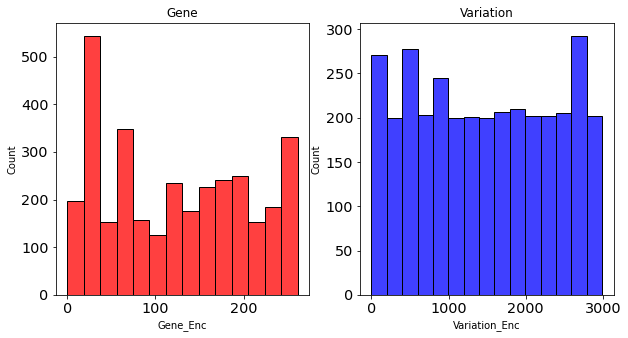

In [48]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(df_training['Gene_Enc'], ax=ax[0], color='red').set(title="Gene")
sns.histplot(df_training['Variation_Enc'], ax=ax[1], color='blue').set(title="Variation")

[Text(0.5, 1.0, 'Gene X Variation')]

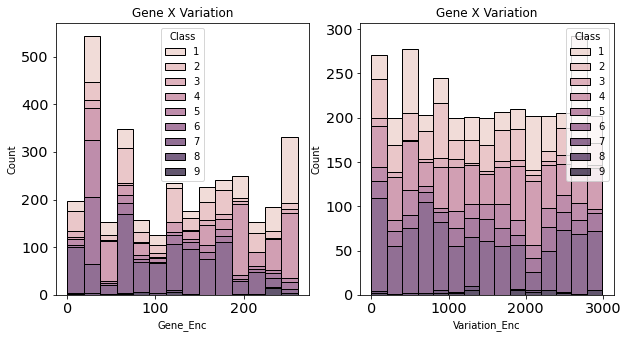

In [49]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Gene_Enc', data = df_training, ax=ax[0], hue = 'Class', multiple='stack').set(title="Gene X Variation")
sns.histplot(x =  'Variation_Enc', data = df_training, ax=ax[1], hue  = 'Class', multiple='stack').set(title="Gene X Variation")

In [50]:
df_training.head()

,Gene,Variation,Class,TEXT,Gene_Enc,Variation_Enc
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,84,2626
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,38,2853
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,38,1895
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,38,1665
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,38,1445


In [51]:
df_training.corr()

,Class,Gene_Enc,Variation_Enc
Class,1.000000,-0.162004,-0.052875
Gene_Enc,-0.162004,1.000000,0.052221
Variation_Enc,-0.052875,0.052221,1.000000


In [52]:
corr_df = df_training.corr()

Text(0.5, 1.0, 'Mapa de Correlação')

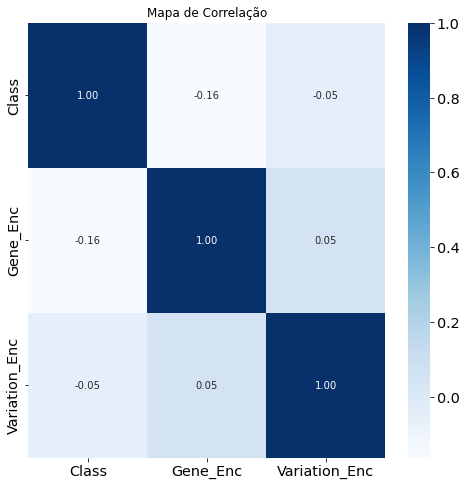

In [53]:
plt.figure(figsize = (8, 8))
sns.heatmap(corr_df, cmap = 'Blues', annot = True, fmt = '.2f').set_title('Mapa de Correlação')

 Para as variáveis Gene e Variations , não existem correlação, os dados estão dispersos sem correlação e muito fraca. Com isso, abaixo serão avaliados o NLP - Natural Language Processing para a extração dos Textos de comentários das Mutações, para complementar os modelos de ML possíveis.

#### NLP - TIDF e word2vector

Análise de Textos Campo TEXT(as evidências clínicas utilizadas para classificar a mutação genética) - 

In [54]:
# Create Bag of Words features
vectorizer = CountVectorizer(stop_words='english')
X_bow = vectorizer.fit_transform(df_training['TEXT'])

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df_training['TEXT'])

# Tokenize the text
tokenized_text = df_training['TEXT'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

# Create Word2Vec features by averaging word vectors for each document
def get_avg_word2vec(tokens, model, vector_size):
    feature_vec = np.zeros((vector_size,), dtype="float32")
    n_words = 0
    for word in tokens:
        if word in model.wv.key_to_index:
            n_words += 1
            feature_vec = np.add(feature_vec, model.wv[word])
    if n_words > 0:
        feature_vec = np.divide(feature_vec, n_words)
    return feature_vec

X_word2vec = np.array([get_avg_word2vec(tokens, word2vec_model, 100) for tokens in tokenized_text])

#### NLP - TFIDF

In [55]:


# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df_training['TEXT'])

# Convert the sparse matrix to a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Join the TF-IDF DataFrame with the original DataFrame
df_combined = pd.concat([df_training.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# One-hot encode the categorical variables
one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(df_training[['Gene', 'Variation']])

# Combine the categorical and TF-IDF features
X_combined = hstack([X_categorical, X_tfidf])

# Prepare the target variable
y = df_training['Class']




# Modelos

Distribuir os Dados em Treino e Teste

In [56]:
from sklearn.model_selection import train_test_split

# Separa X e y
X = df_training_model.iloc[:,0:2]  
y = df_training_model.iloc[:, 2] 
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)

In [57]:
# Shape dos dados reamostrados 
X.shape

(3316, 2)

In [58]:
# Shape dos dados reamostrados 
y.values.reshape(-1,1) 
y.shape

(3316,)

In [59]:
# Variáveis X 
df_training_model.iloc[:,0:2].head()

,Gene_Enc,Variation_Enc
0,84,2626
1,38,2853
2,38,1895
3,38,1665
4,38,1445


In [60]:
# Variável Y Target 
df_training_model.iloc[:, 2].head()

0    1
1    2
2    2
3    3
4    4
Name: Class, dtype: int64

Normalizar os dados se necessário

In [61]:
X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled = StandardScaler().fit_transform(X_test)

### Modelo SVM Base

In [62]:
# Cria o modelo SVM 
modelo_svm_v1 = svm.SVC(kernel = 'linear')

In [63]:
# Treinamento
start = time.time()
modelo_svm_v1.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de Treinamento do Modelo:', end - start)

Tempo de Treinamento do Modelo: 0.9025280475616455


In [64]:
# Previsões
previsoes_v1 = modelo_svm_v1.predict(X_test_scaled)

In [65]:
#predicting the Test data using our trained Linear SVM model
print(classification_report(previsoes_v1, previsoes_v1))

              precision    recall  f1-score   support

           4       1.00      1.00      1.00       242
           7       1.00      1.00      1.00       422

    accuracy                           1.00       664
   macro avg       1.00      1.00      1.00       664
weighted avg       1.00      1.00      1.00       664



In [66]:
# Dicionário de métricas e metadados
SVM_dict_v1 = {'Modelo':'SVM',
               'Versão':'1',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v1, y_test, pos_label='positive',average='macro'),
               'Recall':recall_score(previsoes_v1, y_test, pos_label='positive', average='macro'),
               'F1 Score':f1_score(previsoes_v1, y_test, pos_label='positive', average='macro'),
               'Acurácia':accuracy_score(previsoes_v1, y_test)}

In [67]:
# Print
print("Métricas em Teste:\n")
SVM_dict_v1

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '1',
 'Kernel': 'Linear',
 'Precision': 0.15329218106995887,
 'Recall': 0.07615143246336697,
 'F1 Score': 0.10146927377000864,
 'Acurácia': 0.34036144578313254}

### Modelo SVM 2 - Otimização de Hiperparâmetros com Grid Search e Kernel RBF

In [68]:
# Cria o modelo
modelo_v2 = svm.SVC(kernel = 'rbf')

# Valores para o grid
C_range = np.array([50., 100., 200.])
gamma_range = np.array([0.3*0.001,0.001,3*0.001])

# Grid de hiperparâmetros
svm_param_grid = dict(gamma = gamma_range, C = C_range)

# Grid Search
start = time.time()
modelo_v2_grid_search_rbf = GridSearchCV(modelo_v2, svm_param_grid, cv = 3)

# Treinamento
modelo_v2_grid_search_rbf.fit(X_train_scaled, y_train)
end = time.time()
print('Tempo de Treinamento do Modelo com Grid Search:', end - start)

# Acurácia em Treino
print(f"Acurácia em Treinamento: {modelo_v2_grid_search_rbf.best_score_ :.2%}")
print("")
print(f"Hiperparâmetros Ideais: {modelo_v2_grid_search_rbf.best_params_}")

# Previsões
previsoes_v2 = modelo_v2_grid_search_rbf.predict(X_test_scaled)



Tempo de Treinamento do Modelo com Grid Search: 14.752351999282837
Acurácia em Treinamento: 35.90%

Hiperparâmetros Ideais: {'C': 200.0, 'gamma': 0.001}


In [69]:
# Dicionário de métricas e metadados
SVM_dict_v2 = {'Modelo':'SVM',
               'Versão':'2',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v2, y_test, pos_label='positive',average='macro'),
               'Recall':recall_score(previsoes_v2, y_test, pos_label='positive', average='macro'),
               'F1 Score':f1_score(previsoes_v2, y_test, pos_label='positive', average='macro'),
               'Acurácia':accuracy_score(previsoes_v2, y_test)}

# Print
print("Métricas em Teste:\n")
SVM_dict_v2

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '2',
 'Kernel': 'Linear',
 'Precision': 0.1651344015410209,
 'Recall': 0.08666763827696125,
 'F1 Score': 0.11135084087029168,
 'Acurácia': 0.37349397590361444}

### Modelo SVM 3 - Modelo com BOW , word2vector , TFIDF

In [70]:
# Train and evaluate SVM model for Bag of Words
X_train_bow, X_test_bow, y_train, y_test = train_test_split(X_bow, df_training_model.iloc[:, 2], test_size=0.2, random_state=42)

svm_bow = svm.SVC(kernel='linear')
svm_bow.fit(X_train_bow, y_train)
y_pred_bow = svm_bow.predict(X_test_bow)

print("Bag of Words Classification Report:\n", classification_report(y_test, y_pred_bow))
print("Bag of Words Accuracy Score:", accuracy_score(y_test, y_pred_bow))

# Train and evaluate SVM model for TF-IDF
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, df_training_model.iloc[:, 2], test_size=0.2, random_state=42)

svm_tfidf = svm.SVC(kernel='linear')
svm_tfidf.fit(X_train_tfidf, y_train)
y_pred_tfidf = svm_tfidf.predict(X_test_tfidf)

print("TF-IDF Classification Report:\n", classification_report(y_test, y_pred_tfidf))
print("TF-IDF Accuracy Score:", accuracy_score(y_test, y_pred_tfidf))

# Train and evaluate SVM model for Word2Vec
X_train_w2v, X_test_w2v, y_train, y_test = train_test_split(X_word2vec, df_training_model.iloc[:, 2], test_size=0.2, random_state=42)

svm_w2v = svm.SVC(kernel='linear')
svm_w2v.fit(X_train_w2v, y_train)
y_pred_w2v = svm_w2v.predict(X_test_w2v)


print("Word2Vec Classification Report:\n", classification_report(y_test, y_pred_w2v))
print("Word2Vec Accuracy Score:", accuracy_score(y_test, y_pred_w2v))





Bag of Words Classification Report:
               precision    recall  f1-score   support

           1       0.50      0.63      0.56       118
           2       0.57      0.51      0.54       105
           3       0.25      0.20      0.22        20
           4       0.66      0.62      0.64       135
           5       0.43      0.34      0.38        47
           6       0.56      0.67      0.61        42
           7       0.69      0.66      0.68       188
           8       0.20      0.33      0.25         3
           9       0.80      0.67      0.73         6

    accuracy                           0.59       664
   macro avg       0.52      0.52      0.51       664
weighted avg       0.59      0.59      0.59       664

Bag of Words Accuracy Score: 0.5873493975903614
TF-IDF Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.60      0.60       118
           2       0.65      0.33      0.44       105
           3    

### Modelo SVM 4 - Modelo TFIDF com Variáveis do DF Trainnig Gene , Variation e Class com TDIDF

In [71]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model_v4 = svm.SVC(kernel='linear')
svm_model_v4.fit(X_train, y_train)

# Make predictions on the testing set
previsoes_v4 = svm_model_v4.predict(X_test)

# Print the classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, previsoes_v4))
print("Accuracy Score:", accuracy_score(y_test, previsoes_v4))


Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.67      0.68       118
           2       0.70      0.45      0.55       105
           3       0.67      0.20      0.31        20
           4       0.76      0.78      0.77       135
           5       0.47      0.43      0.44        47
           6       0.62      0.57      0.59        42
           7       0.66      0.88      0.76       188
           8       0.50      0.33      0.40         3
           9       0.80      0.67      0.73         6

    accuracy                           0.68       664
   macro avg       0.65      0.55      0.58       664
weighted avg       0.68      0.68      0.66       664

Accuracy Score: 0.677710843373494


In [72]:
# Dicionário de métricas e metadados
SVM_dict_v4 = {'Modelo':'SVM',
               'Versão':'4',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v4, y_test, pos_label='positive',average='macro'),
               'Recall':recall_score(previsoes_v4, y_test, pos_label='positive', average='macro'),
               'F1 Score':f1_score(previsoes_v4, y_test, pos_label='positive', average='macro'),
               'Acurácia':accuracy_score(previsoes_v4, y_test)}

# Print
print("Métricas em Teste:\n")
SVM_dict_v4

Métricas em Teste:



{'Modelo': 'SVM',
 'Versão': '4',
 'Kernel': 'Linear',
 'Precision': 0.5527586178385553,
 'Recall': 0.651907869570612,
 'F1 Score': 0.5807678454595417,
 'Acurácia': 0.677710843373494}

### Modelo KNN 5 - Modelo TFIDF com Variáveis do DF Trainnig Gene , Variation e Class com TDIDF

In [73]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=9)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the testing set
previsoes_v5 = knn_model.predict(X_test)

# Print the classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, previsoes_v4))
print("Accuracy Score:", accuracy_score(y_test, previsoes_v5))


Classification Report:
               precision    recall  f1-score   support

           1       0.70      0.67      0.68       118
           2       0.70      0.45      0.55       105
           3       0.67      0.20      0.31        20
           4       0.76      0.78      0.77       135
           5       0.47      0.43      0.44        47
           6       0.62      0.57      0.59        42
           7       0.66      0.88      0.76       188
           8       0.50      0.33      0.40         3
           9       0.80      0.67      0.73         6

    accuracy                           0.68       664
   macro avg       0.65      0.55      0.58       664
weighted avg       0.68      0.68      0.66       664

Accuracy Score: 0.5933734939759037


In [74]:
# Dicionário de métricas e metadados
knn_dict_v5 = {'Modelo':'KNN',
               'Versão':'5',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v5, y_test, pos_label='positive',average='macro'),
               'Recall':recall_score(previsoes_v5, y_test, pos_label='positive', average='macro'),
               'F1 Score':f1_score(previsoes_v5, y_test, pos_label='positive', average='macro'),
               'Acurácia':accuracy_score(previsoes_v5, y_test)}

# Print
print("Métricas em Teste:\n")
knn_dict_v5

Métricas em Teste:



{'Modelo': 'KNN',
 'Versão': '5',
 'Kernel': 'Linear',
 'Precision': 0.4530445911942086,
 'Recall': 0.5605542406122838,
 'F1 Score': 0.4862370562688145,
 'Acurácia': 0.5933734939759037}

### Modelo Randonforrest 6 - Modelo TFIDF com Variáveis do DF Trainnig Gene , Variation e Class com TDIDF

In [76]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model_v6 = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_model_v6.fit(X_train, y_train)

# Make predictions on the testing set
previsoes_v6 = rf_model_v6.predict(X_test)


# Print the classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, previsoes_v6))
print("Accuracy Score:", accuracy_score(y_test, previsoes_v6))


Classification Report:
               precision    recall  f1-score   support

           1       0.60      0.58      0.59       118
           2       0.75      0.34      0.47       105
           3       0.38      0.25      0.30        20
           4       0.67      0.69      0.68       135
           5       0.55      0.38      0.45        47
           6       0.68      0.62      0.65        42
           7       0.60      0.87      0.71       188
           8       0.00      0.00      0.00         3
           9       0.67      0.67      0.67         6

    accuracy                           0.62       664
   macro avg       0.54      0.49      0.50       664
weighted avg       0.63      0.62      0.61       664

Accuracy Score: 0.6234939759036144


In [77]:
# Dicionário de métricas e metadados
rf_dict_v6 = {'Modelo':'RF',
               'Versão':'6',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v6, y_test, pos_label='positive',average='macro'),
               'Recall':recall_score(previsoes_v6, y_test, pos_label='positive', average='macro'),
               'F1 Score':f1_score(previsoes_v6, y_test, pos_label='positive', average='macro'),
               'Acurácia':accuracy_score(previsoes_v6, y_test)}

# Print
print("Métricas em Teste:\n")
rf_dict_v6

Métricas em Teste:



{'Modelo': 'RF',
 'Versão': '6',
 'Kernel': 'Linear',
 'Precision': 0.48878340587079616,
 'Recall': 0.5444323933984694,
 'F1 Score': 0.5019741658686893,
 'Acurácia': 0.6234939759036144}

### Modelo GradientBoostingClassifier 7 - Modelo TFIDF com Variáveis do DF Trainnig Gene , Variation e Class com TDIDF

In [78]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)


# Cria o classificador
GBoosting_model_v7 = GradientBoostingClassifier(n_estimators = 20, learning_rate = 1.0, random_state = 0)
GBoosting_model_v7.fit(X_train, y_train)

# Make predictions on the testing set
previsoes_v7 = GBoosting_model_v7.predict(X_test)


# Print the classification report and accuracy score
print("Classification Report:\n", classification_report(y_test, previsoes_v7))
print("Accuracy Score:", accuracy_score(y_test, previsoes_v7))

Classification Report:
               precision    recall  f1-score   support

           1       0.53      0.67      0.59       118
           2       0.55      0.36      0.44       105
           3       0.45      0.25      0.32        20
           4       0.67      0.65      0.66       135
           5       0.40      0.30      0.34        47
           6       0.60      0.57      0.59        42
           7       0.62      0.72      0.66       188
           8       0.00      0.00      0.00         3
           9       0.57      0.67      0.62         6

    accuracy                           0.58       664
   macro avg       0.49      0.47      0.47       664
weighted avg       0.58      0.58      0.57       664

Accuracy Score: 0.5828313253012049


In [79]:
# Dicionário de métricas e metadados
gb_dict_v7 = {'Modelo':'GradientBoosting',
               'Versão':'7',
               'Kernel':'Linear',
               'Precision':precision_score(previsoes_v6, y_test, pos_label='positive',average='macro'),
               'Recall':recall_score(previsoes_v6, y_test, pos_label='positive', average='macro'),
               'F1 Score':f1_score(previsoes_v6, y_test, pos_label='positive', average='macro'),
               'Acurácia':accuracy_score(previsoes_v6, y_test)}

# Print
print("Métricas em Teste:\n")
gb_dict_v7

Métricas em Teste:



{'Modelo': 'GradientBoosting',
 'Versão': '7',
 'Kernel': 'Linear',
 'Precision': 0.48878340587079616,
 'Recall': 0.5444323933984694,
 'F1 Score': 0.5019741658686893,
 'Acurácia': 0.6234939759036144}

### Qualificação do Melhor Modelo

In [81]:
df_model_review = pd.DataFrame([SVM_dict_v1,SVM_dict_v2, SVM_dict_v4,  knn_dict_v5, rf_dict_v6, gb_dict_v7])

In [82]:
df_model_review

,Modelo,Versão,Kernel,Precision,Recall,F1 Score,Acurácia
0,SVM,1,Linear,0.153292,0.076151,0.101469,0.340361
1,SVM,2,Linear,0.165134,0.086668,0.111351,0.373494
2,SVM,4,Linear,0.552759,0.651908,0.580768,0.677711
3,KNN,5,Linear,0.453045,0.560554,0.486237,0.593373
4,RF,6,Linear,0.488783,0.544432,0.501974,0.623494
5,GradientBoosting,7,Linear,0.488783,0.544432,0.501974,0.623494


Text(0.5, 1.0, 'Avaliação de Modelos')

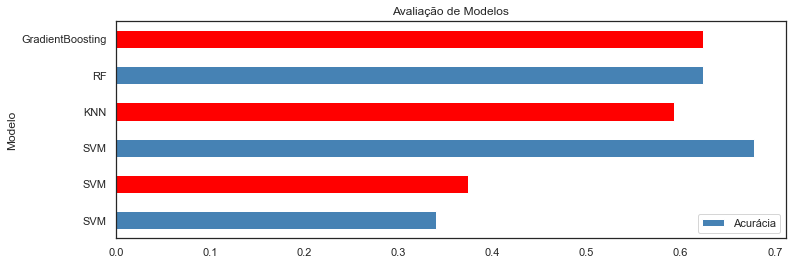

In [83]:
#set seaborn plotting aesthetics
sns.set(style='white')

#create stacked bar chart
df_model_review.set_index('Modelo').plot(kind='barh', y='Acurácia', stacked=True, color=['steelblue', 'red']).set_title('Avaliação de Modelos')

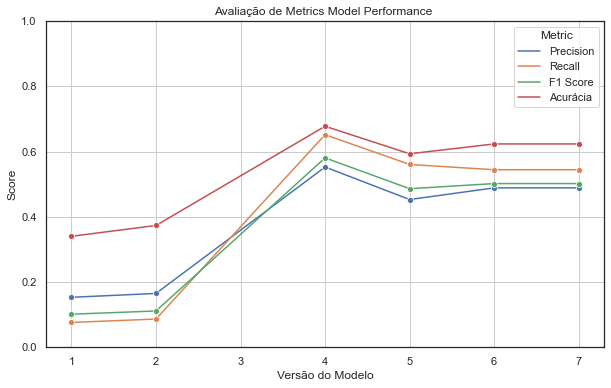

In [85]:
# Ensure versions are treated as numerical values for plotting
df_model_review['Versão'] = pd.to_numeric(df_model_review['Versão'])

# Melt the DataFrame to long-form for Seaborn
df_melted = df_model_review.melt(id_vars=['Modelo', 'Versão'], 
                    value_vars=['Precision', 'Recall', 'F1 Score', 'Acurácia'],
                    var_name='Metric', value_name='Value')

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_melted, x='Versão', y='Value', hue='Metric', marker='o')
plt.title('Avaliação de Metrics Model Performance ')
plt.xlabel('Versão do Modelo')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.grid(True)
plt.show()

Avaliando o Modelos acima, o Modelo escolhido foi o SVM 4 ( Combiando o SVM + TFIDF com maior classificação entre ( word2vetor e bagofwords ).
Os dados para esse modelos estão muito dispersos e mesmo SVM , otimizando parametros, não foi possível uma Acurária melhor que 67%.

### Fazendo Previsões com o Modelo Treinado

In [97]:
df_training.head(10)

,Gene,Variation,Class,TEXT,Gene_Enc,Variation_Enc
0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,84,2626
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,38,2853
2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...,38,1895
3,CBL,N454D,3,Recent evidence has demonstrated that acquired...,38,1665
4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...,38,1445
5,CBL,V391I,4,Oncogenic mutations in the monomeric Casitas B...,38,2720
6,CBL,V430M,5,Oncogenic mutations in the monomeric Casitas B...,38,2724
7,CBL,Deletion,1,CBL is a negative regulator of activated recep...,38,473
8,CBL,Y371H,4,Abstract Juvenile myelomonocytic leukemia (JM...,38,2920
9,CBL,C384R,4,Abstract Juvenile myelomonocytic leukemia (JM...,38,212


In [124]:
df_pred = df_training[1:2]

In [125]:
df_pred

,Gene,Variation,Class,TEXT,Gene_Enc,Variation_Enc
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,38,2853


In [126]:
df_pred_Text = df_training_text[1:2]

In [127]:
df_pred['TEXT'] = df_pred_Text['TEXT']

In [128]:
df_pred

,Gene,Variation,Class,TEXT,Gene_Enc,Variation_Enc
1,CBL,W802*,2,Abstract Background Non-small cell lung canc...,38,2853


In [129]:
df_pred = df_pred[['Gene', 'Variation','TEXT','Class']]

In [130]:
df_pred

,Gene,Variation,TEXT,Class
1,CBL,W802*,Abstract Background Non-small cell lung canc...,2


In [131]:
# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df_pred['TEXT'])

# Convert the sparse matrix to a DataFrame
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Join the TF-IDF DataFrame with the original DataFrame
df_combined = pd.concat([df_pred.reset_index(drop=True), tfidf_df.reset_index(drop=True)], axis=1)

# One-hot encode the categorical variables
one_hot_encoder = OneHotEncoder()
X_categorical = one_hot_encoder.fit_transform(df_pred[['Gene', 'Variation']])

# Combine the categorical and TF-IDF features
X_combined = hstack([X_categorical, X_tfidf])

# Prepare the target variable
y = df_pred['Class']


# Make predictions on the testing set
previsoes_v4 = svm_model_v4.predict(X_test[4])